In [1]:
import pandas as pd
import numpy as np
import keras

In [2]:
np.random.seed(2)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

## Data Exploration

In [5]:
# If class is 0, then it is a normal transaction. Else if class is 1, then it is fraud.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [6]:
from sklearn.preprocessing import StandardScaler

data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis=1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data = data.drop(['Time'], axis=1)

In [9]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [11]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [12]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [14]:
x_train.shape

(199364, 29)

In [15]:
x_test.shape

(85443, 29)

In [16]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
model = Sequential([
    Dense(16, input_dim = 29, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,917 (7.49 KB)

 Trainable params: 1,917 (7.49 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9917 - loss: 0.0285
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9993 - loss: 0.0036
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9995 - loss: 0.0032


In [21]:
score = model.evaluate(x_test, y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0037
[0.003948610741645098, 0.9994382262229919]


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)

cnf_matrix = confusion_matrix(y_test, y_pred.round())

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [23]:
cnf_matrix

array([[85276,    20],
       [   28,   119]])

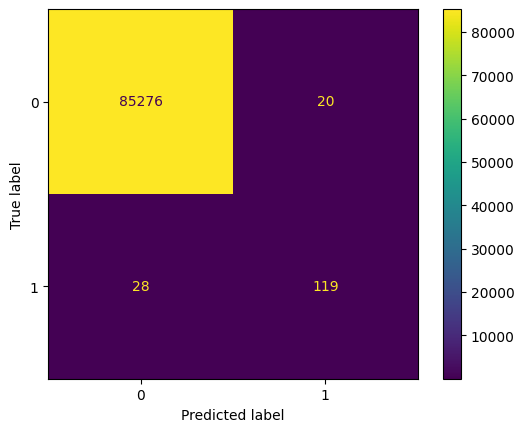

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


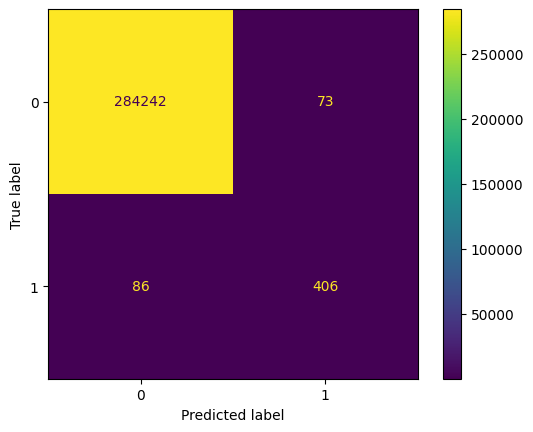

In [25]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)

cnf_matrix = confusion_matrix(y_expected, y_pred.round())

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
random_forest.score(x_test, y_test)

0.9995435553526912

In [28]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [29]:
cnf_matrix

array([[85290,     6],
       [   33,   114]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


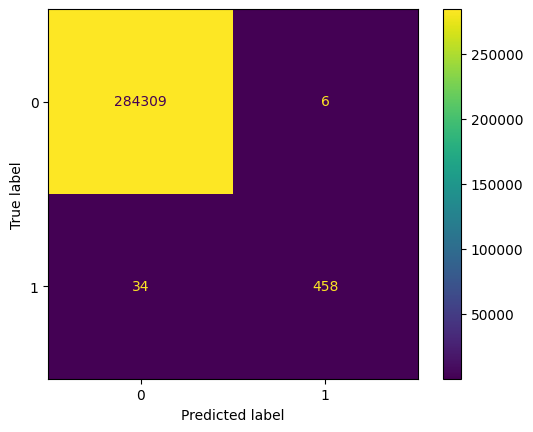

In [30]:
y_pred = random_forest.predict(x)

cnf_matrix = confusion_matrix(y, y_pred.round())

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

## Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
decision_tree.score(x_test, y_test)

0.9992392589211521

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


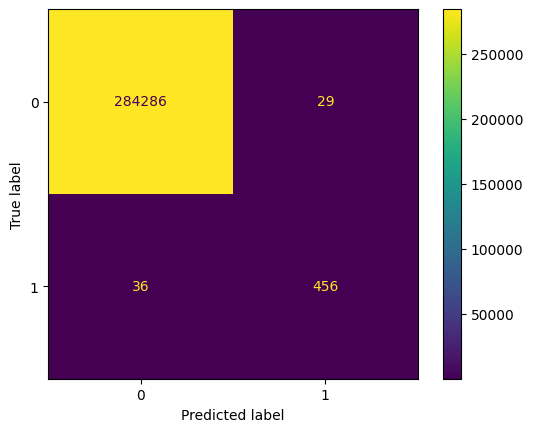

In [32]:
y_pred = decision_tree.predict(x)
y_expected = pd.DataFrame(y)

cnf_matrix = confusion_matrix(y_expected, y_pred.round())

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

## Undersampling

In [33]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [34]:
normal_indices = data[data.Class == 0].index

In [35]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [36]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [37]:
under_sample_data = data.iloc[under_sample_indices, :]

In [38]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,753 (22.48 KB)

 Trainable params: 1,917 (7.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,836 (14.99 KB)

In [42]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9011 - loss: 0.8574
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9308 - loss: 0.2734
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.2020
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9449 - loss: 0.1379
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - loss: 0.1440


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


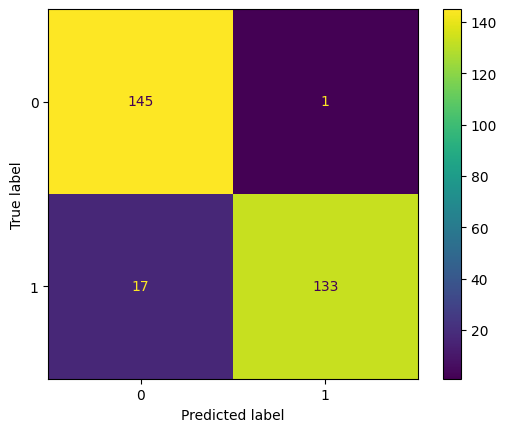

In [43]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix2 = confusion_matrix(y_expected, y_pred.round())

disp2 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix2)
disp2.plot()

## SMOTE (Oversampling)

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [48]:
X_resample, y_resample = SMOTE().fit_resample(x,y)

In [50]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [52]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [53]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step - accuracy: 0.9816 - loss: 0.0477
Epoch 2/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 100s 4ms/step - accuracy: 0.9964 - loss: 0.0132
Epoch 3/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9976 - loss: 0.0099
Epoch 4/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9979 - loss: 0.0086
Epoch 5/5
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.9980 - loss: 0.0083


5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


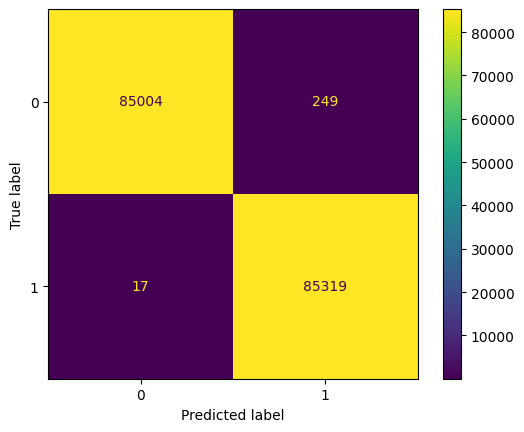

In [54]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix3 = confusion_matrix(y_expected, y_pred.round())

disp3 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix3)
disp3.plot()

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


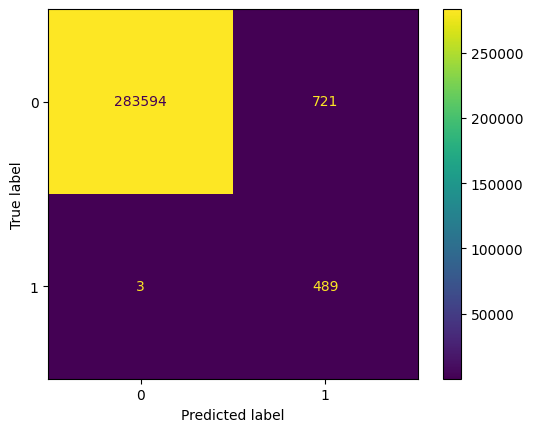

In [57]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
cnf_matrix4 = confusion_matrix(y_expected, y_pred.round())

disp4 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix4)
disp4.plot()